In [164]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [165]:
df = pd.read_csv('heart.csv')

# EDA

In [166]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [167]:
df.shape

(918, 12)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [169]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [170]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [171]:
df.duplicated().sum()

np.int64(0)

In [172]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

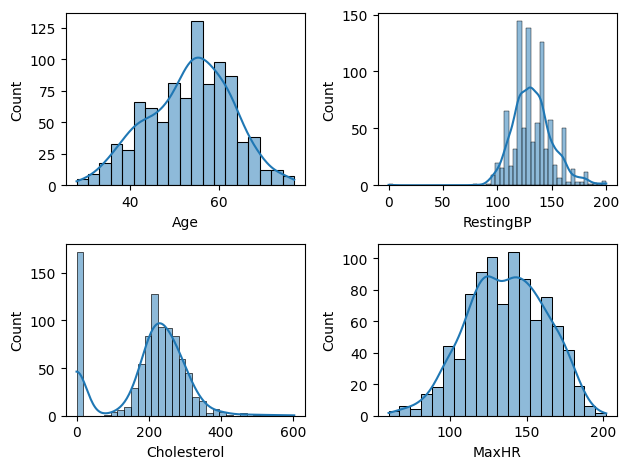

In [173]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde = True)

plotting('Age',1)
plotting('RestingBP',2)
plotting('Cholesterol',3)
plotting('MaxHR',4)


plt.tight_layout()

<Axes: xlabel='HeartDisease', ylabel='count'>

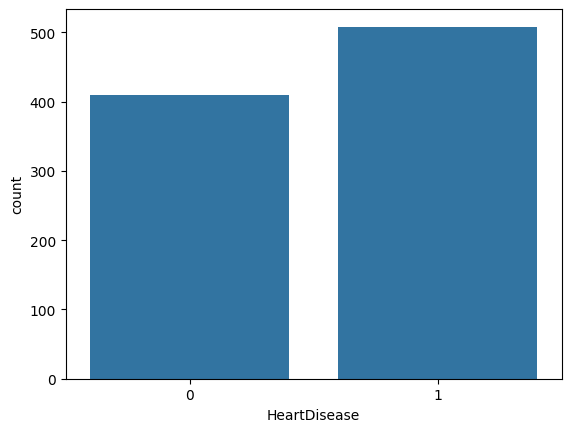

In [174]:
sns.countplot(x = df['HeartDisease'])

<Axes: xlabel='Sex', ylabel='count'>

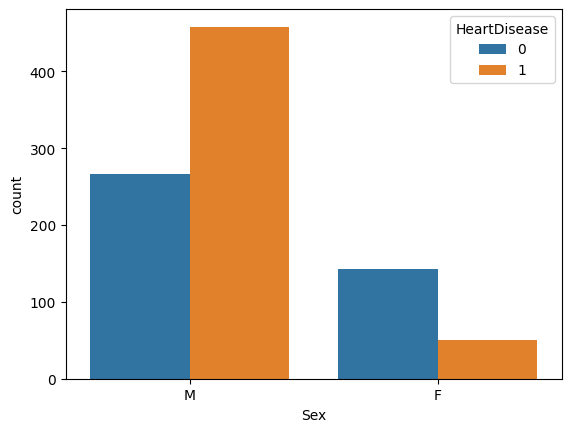

In [175]:
sns.countplot(x = df['Sex'],hue= df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

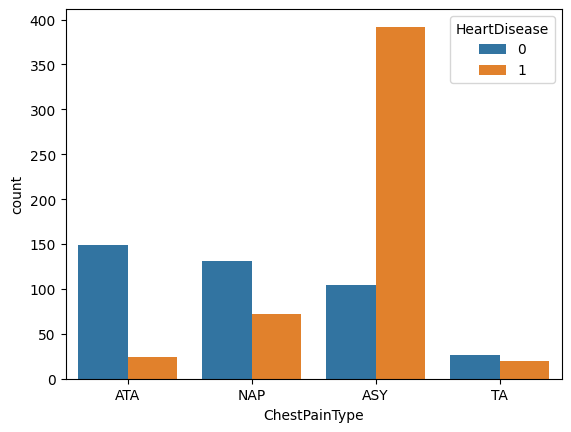

In [176]:
sns.countplot(x = df['ChestPainType'],hue= df['HeartDisease'])

<Axes: xlabel='RestingECG', ylabel='count'>

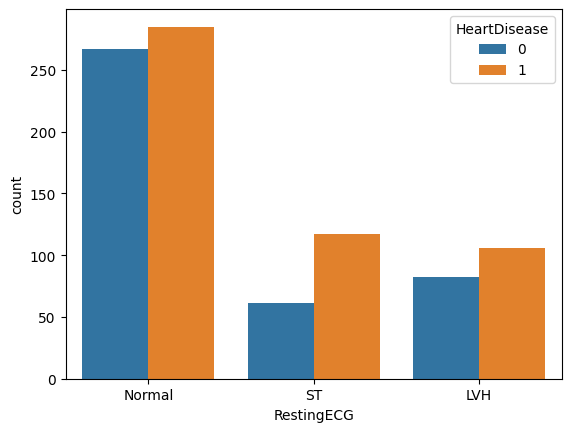

In [177]:
sns.countplot(x = df['RestingECG'], hue= df['HeartDisease'])

<Axes: xlabel='ExerciseAngina', ylabel='count'>

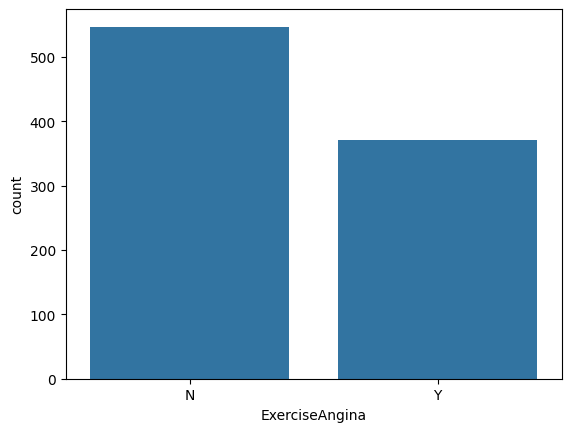

In [178]:
sns.countplot(x = df['ExerciseAngina'])

<Axes: xlabel='ST_Slope', ylabel='count'>

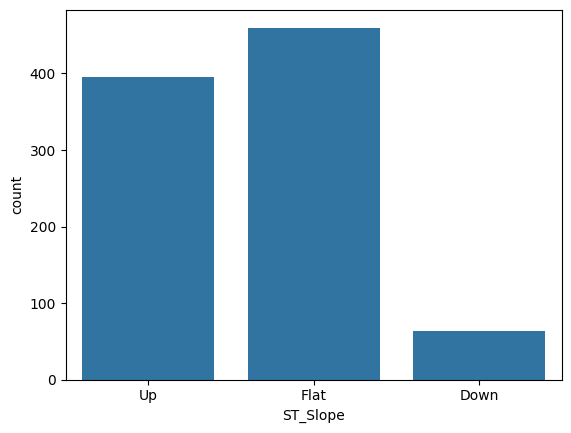

In [179]:
sns.countplot(x = df['ST_Slope'])

In [180]:
df.shape

(918, 12)

In [181]:
df.drop_duplicates(inplace= True)

In [182]:
df.shape

(918, 12)

In [183]:
df['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

In [184]:
non_zero_mean = df[df['Cholesterol'] != 0]['Cholesterol'].mean()
non_zero_mean

np.float64(244.6353887399464)

In [185]:
df['Cholesterol'] = df['Cholesterol'].replace(0, non_zero_mean)
df['Cholesterol'] = df['Cholesterol'].round(2)

In [186]:
df['Cholesterol'].value_counts()

Cholesterol
244.64    172
254.00     11
220.00     10
223.00     10
204.00      9
         ... 
353.00      1
278.00      1
157.00      1
176.00      1
131.00      1
Name: count, Length: 222, dtype: int64

In [187]:
non_zero_mean = df[df['RestingBP'] != 0]['RestingBP'].mean()
non_zero_mean

np.float64(132.54089422028352)

In [188]:
df['RestingBP'] = df['RestingBP'].replace(0, non_zero_mean)
df['RestingBP'] = df['RestingBP'].round(2)

In [189]:
df['RestingBP'].value_counts()

RestingBP
120.0    132
130.0    118
140.0    107
110.0     58
150.0     55
        ... 
101.0      1
117.0      1
192.0      1
129.0      1
164.0      1
Name: count, Length: 67, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

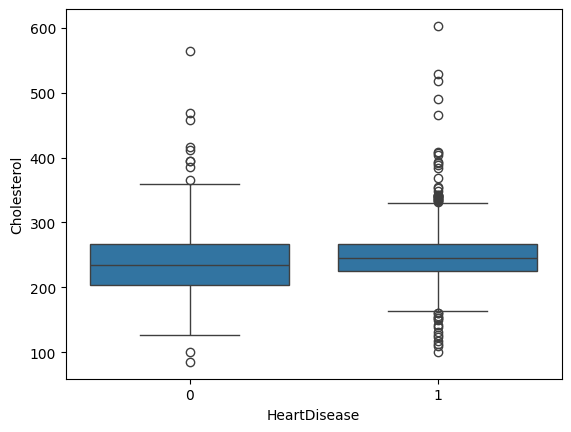

In [190]:
sns.boxplot(x = "HeartDisease",y= "Cholesterol", data = df)

<Axes: >

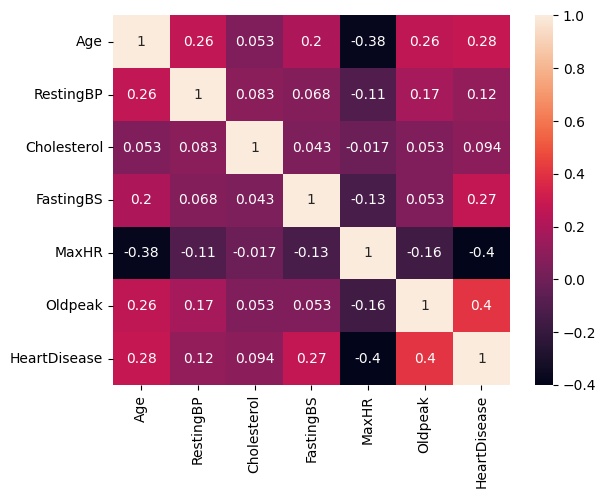

In [191]:
sns.heatmap(df.corr(numeric_only=True), annot= True)

In [192]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0


In [193]:
df_cleaned = df.copy()

In [194]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [195]:
df_cleaned['Sex'] = df_cleaned['Sex'].map({'M': 1, 'F': 0})

In [196]:
df_cleaned['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [197]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['ChestPainType'],)

In [198]:
df_cleaned.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140.0,289.0,0,Normal,172,N,0.0,Up,0,False,True,False,False
1,49,0,160.0,180.0,0,Normal,156,N,1.0,Flat,1,False,False,True,False
2,37,1,130.0,283.0,0,ST,98,N,0.0,Up,0,False,True,False,False
3,48,0,138.0,214.0,0,Normal,108,Y,1.5,Flat,1,True,False,False,False
4,54,1,150.0,195.0,0,Normal,122,N,0.0,Up,0,False,False,True,False


In [199]:
df_cleaned['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [200]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['RestingECG'],)

In [201]:
df_cleaned['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [202]:
df_cleaned['ExerciseAngina'] = df_cleaned['ExerciseAngina'].map({'N': 1, 'Y': 0})

In [203]:
df_cleaned['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [204]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['ST_Slope'],)

In [205]:
df_cleaned = df_cleaned.astype(int)

In [206]:
df_cleaned.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [207]:
from scipy.stats import pearsonr

Selected_features = ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up']

Coorealation = {
    feature : pearsonr(df_cleaned['HeartDisease'], df_cleaned[feature])[0]
    for feature in Selected_features
}

Coorealation_df = pd.DataFrame(list(Coorealation.items()), columns=['Feature', 'Person Correlation'])
Coorealation_df.sort_values(by = 'Person Correlation', ascending=False)

,Feature,Person Correlation
16,ST_Slope_Flat,0.554134
8,ChestPainType_ASY,0.516716
7,Oldpeak,0.392385
1,Sex,0.305445
0,Age,0.282039
4,FastingBS,0.267291
15,ST_Slope_Down,0.122527
2,RestingBP,0.117909
14,RestingECG_ST,0.102527
3,Cholesterol,0.092586


In [208]:
cat_features = ['Sex', 'FastingBS', 'ExerciseAngina', 'Oldpeak', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 
       'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']

In [209]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05  # Significance level

df_cleaned['HeartDisease_bin'] = df_cleaned['HeartDisease']

chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['HeartDisease_bin'])

    # Skip columns with zero variance (Chi-square can't be calculated)
    if contingency.shape[0] < 2 or contingency.shape[1] < 2:
        chi2_results[col] = {
            'chi2_statistic': None,
            'p_value': None,
            'Decision': 'Skipped (Low Variance)'
        }
        continue

    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'

    chi2_results[col] = {
        'chi2_statistic': round(chi2_stat, 4),
        'p_value': round(p_val, 4),
        'Decision': decision
    }

# Convert result dict to DataFrame
chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value', na_position='last')
chi2_df


,chi2_statistic,p_value,Decision
Sex,84.1451,0.0,Reject Null (Keep Feature)
FastingBS,64.3207,0.0,Reject Null (Keep Feature)
ExerciseAngina,222.2594,0.0,Reject Null (Keep Feature)
Oldpeak,182.8495,0.0,Reject Null (Keep Feature)
ChestPainType_ASY,243.0211,0.0,Reject Null (Keep Feature)
ChestPainType_ATA,146.2363,0.0,Reject Null (Keep Feature)
ChestPainType_NAP,40.6087,0.0,Reject Null (Keep Feature)
ST_Slope_Flat,279.6599,0.0,Reject Null (Keep Feature)
ST_Slope_Up,352.8239,0.0,Reject Null (Keep Feature)
ST_Slope_Down,12.8241,0.0003,Reject Null (Keep Feature)


In [210]:
cols = ['Age', 'RestingBP',	'Cholesterol', 'MaxHR']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [211]:
df_cleaned.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease_bin
0,-1.433140,1,0.414885,0.834754,0,1.382928,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,-0.478484,0,1.527224,-1.210675,0,0.754157,1,1,1,0,0,1,0,0,1,0,0,1,0,1
2,-1.751359,1,-0.141284,0.722161,0,-1.525138,1,0,0,0,1,0,0,0,0,1,0,0,1,0
3,-0.584556,0,0.303651,-0.572651,0,-1.132156,0,1,1,1,0,0,0,0,1,0,0,1,0,1
4,0.051881,1,0.971054,-0.929194,0,-0.581981,1,0,0,0,0,1,0,0,1,0,0,0,1,0


In [212]:
df_cleaned.drop(columns= "HeartDisease_bin", inplace= True)

In [213]:
df_cleaned.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.414885,0.834754,0,1.382928,1,0,0,0,1,0,0,0,1,0,0,0,1
1,-0.478484,0,1.527224,-1.210675,0,0.754157,1,1,1,0,0,1,0,0,1,0,0,1,0
2,-1.751359,1,-0.141284,0.722161,0,-1.525138,1,0,0,0,1,0,0,0,0,1,0,0,1
3,-0.584556,0,0.303651,-0.572651,0,-1.132156,0,1,1,1,0,0,0,0,1,0,0,1,0
4,0.051881,1,0.971054,-0.929194,0,-0.581981,1,0,0,0,0,1,0,0,1,0,0,0,1


In [214]:
df_cleaned.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [215]:
final_df = df_cleaned[['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up']]

In [216]:
final_df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,1,0.414885,0.834754,0,1.382928,1,0,0,0,1,0,1,0,0,0,1
1,-0.478484,0,1.527224,-1.210675,0,0.754157,1,1,1,0,0,1,1,0,0,1,0
2,-1.751359,1,-0.141284,0.722161,0,-1.525138,1,0,0,0,1,0,0,1,0,0,1
3,-0.584556,0,0.303651,-0.572651,0,-1.132156,0,1,1,1,0,0,1,0,0,1,0
4,0.051881,1,0.971054,-0.929194,0,-0.581981,1,0,0,0,0,1,1,0,0,0,1


In [219]:
final_df = final_df.to_csv('clean_heart.csv')